In [11]:
import numpy as np
import statsmodels.nonparametric.api as nparam
import statsmodels.api as sm


In [12]:

if __name__ == '__main__':

    np.random.seed(500)
    nobs = [250, 1000][0]
    sig_fac = 1
    x = np.random.uniform(-2, 2, size=nobs)
    x.sort()
    y_true = np.sin(x*5)/x + 2*x
    y = y_true + sig_fac * (np.sqrt(np.abs(3+x))) * np.random.normal(size=nobs)

    model = nparam.KernelReg(endog=[y],
                             exog=[x], reg_type='lc',
                             var_type='c', bw='cv_ls',
                             defaults=nparam.EstimatorSettings(efficient=True))

    sm_bw = model.bw

    sm_mean, sm_mfx = model.fit()

In [14]:
model1 = nparam.KernelReg(endog=[y],
                             exog=[x], reg_type='lc',
                             var_type='c', bw='cv_ls')
mean1, mfx1 = model1.fit()

model2 = nparam.KernelReg(endog=[y],
                             exog=[x], reg_type='ll',
                             var_type='c', bw='cv_ls')

mean2, mfx2 = model2.fit()

print(model.bw)
print(model1.bw)
print(model2.bw)

[0.30082959]
[0.1079096]
[0.11641064]


In [19]:
lowess_sm = sm.nonparametric.lowess
yest_sm = lowess_sm(y,x,frac=1./3.,it=3, return_sorted = False)

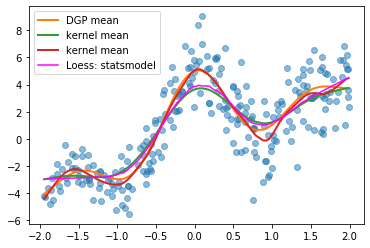

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, y, 'o', alpha=0.5)
ax.plot(x, y_true, lw=2, label='DGP mean')
ax.plot(x, sm_mean, lw=2, label='kernel mean')
ax.plot(x, mean2, lw=2, label='kernel mean')
plt.plot(x,yest_sm,color = 'magenta', label = 'Loess: statsmodel')
ax.legend()

plt.show()